In [1]:
import pandas as pd
import seaborn as sns
import os
from sktime.forecasting.base import ForecastingHorizon
from sklearn.neighbors import KNeighborsRegressor
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
)
from sktime.forecasting.compose import (
    EnsembleForecaster,
    make_reduction,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_evaluation import evaluate
from tqdm import tqdm
import glob
from pyspark.sql import SparkSession


In [4]:
# Lets read the data

cwdir = os.getcwd()
# Get list of all stocks:
files = glob.glob(cwdir + "/../../data/S&P500/individual_stocks_5yr/individual_stocks_5yr/*.csv")

spark = SparkSession.builder \
          .appName("SparkByExamples.com") \
          .getOrCreate()

all_stocks = dict()

for file in tqdm(files):
    filename = file[file.rfind("/")+1:-9]
    #df = spark.read.csv(file)
    all_stocks[filename] = spark.read.csv(file, header=True)

print("done.")
#df = spark.read.csv(cwdir + "/../../data/S&P500/individual_stocks_5yr/individual_stocks_5yr/")

100%|██████████| 505/505 [00:25<00:00, 19.91it/s]

done.


In [13]:
print(all_stocks["JCI"].show(5))

+----------+-------+-------+-------+-------+---------+----+
|      date|   open|   high|    low|  close|   volume|Name|
+----------+-------+-------+-------+-------+---------+----+
|2013-02-08|67.7142|68.4014|66.8928|67.8542|158168416|AAPL|
|2013-02-11|68.0714|69.2771|67.6071|68.5614|129029425|AAPL|
|2013-02-12|68.5014|68.9114|66.8205|66.8428|151829363|AAPL|
|2013-02-13|66.7442|67.6628|66.1742|66.7156|118721995|AAPL|
|2013-02-14|66.3599|67.3771|66.2885|66.6556| 88809154|AAPL|
+----------+-------+-------+-------+-------+---------+----+
only showing top 5 rows

None


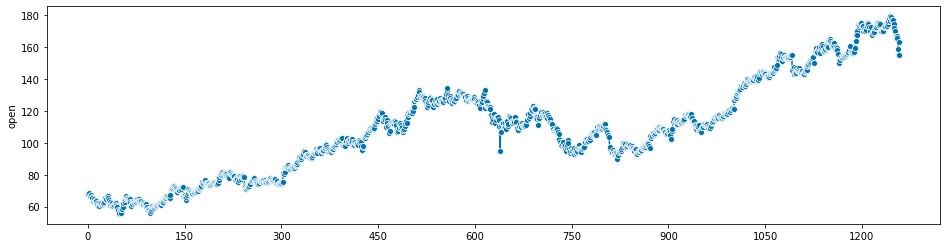

In [20]:
aapl = all_stocks["AAPL"]
jci = all_stocks["JCI"]
curr = aapl.toPandas()["open"].astype('float64')
#import seaborn as sns
#sns.scatterplot(curr)
plot_series(curr);
#plot_series(jci.toPandas()["open"]);

In [ ]:
data = cwdir + "/../../data/S&P500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv"
data = pd.read_csv(data)
data = data["open"]
plot_series(data);

In [ ]:
data = cwdir + "/../../data/S&P500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv"
data = pd.read_csv(data)
data = data["open"]
plot_series(data);


959 300


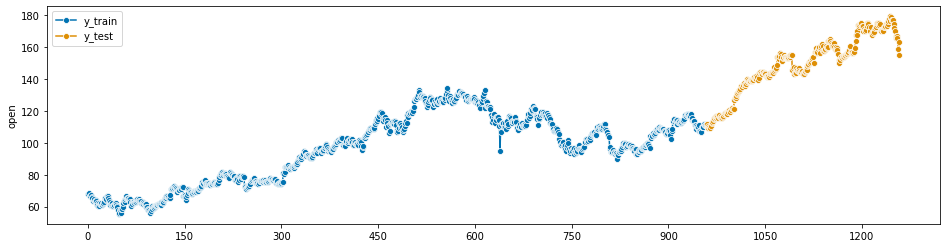

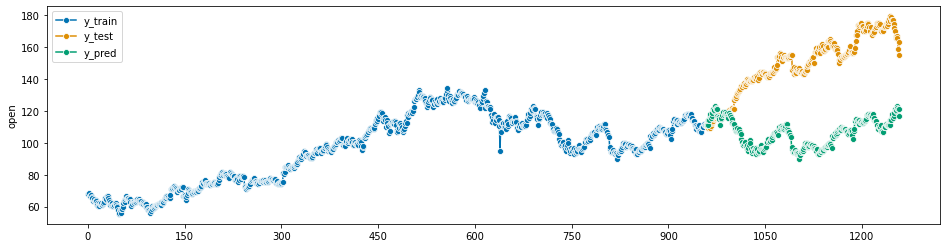

In [6]:
y_train, y_test = temporal_train_test_split(data, test_size=300)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])
plt.show()

fh = ForecastingHorizon(y_test.index, is_relative=False)
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#mean_absolute_percentage_error(y_pred, y_test)
plt.show()
